In [ ]:
# Import our dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score


In [ ]:
#Import the dataset that we will train
stock_top_df = pd.read_csv("dataframes_top.csv")
stock_top_df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,Market
0,2019-01-02,38.722500,39.712502,38.557499,39.480000,38.277523,148158800,AAPL,SP500
1,2019-01-03,35.994999,36.430000,35.500000,35.547501,34.464802,365248800,AAPL,SP500
2,2019-01-04,36.132500,37.137501,35.950001,37.064999,35.936077,234428400,AAPL,SP500
3,2019-01-07,37.174999,37.207500,36.474998,36.982498,35.856098,219111200,AAPL,SP500
4,2019-01-08,37.389999,37.955002,37.130001,37.687500,36.539619,164101200,AAPL,SP500
...,...,...,...,...,...,...,...,...,...
3025,2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600,TSLA,SP500
3026,2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600,TSLA,SP500
3027,2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800,TSLA,SP500
3028,2020-12-30,672.000000,696.599976,668.359985,694.780029,694.780029,42846000,TSLA,SP500


In [ ]:
# '.values' need the 2nd Column Opening Price as a Numpy array (not vector)
training_set = stock_top_df.iloc[:, 1:2].values
training_set

array([[ 38.72249985],
       [ 35.99499893],
       [ 36.13249969],
       ...,
       [661.        ],
       [672.        ],
       [699.98999023]])

In [ ]:
# 'feature_range = (0,1)' makes sure that training data is scaled to have values between 0 and 1

scaler = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scaler.fit_transform(training_set)

In [ ]:
# Using Recurrent Neural Network (RNN) Deep Learning technique for continuous data pattern recognition. RNN takes into account how data changes over time.
# For that we need to Create a data structure with 60 timesteps (look back 60 days) and 1 output, telling RNN what to remember (Number of timesteps) when predicting the next Stock Price.

X_train = []

# 'y_train' Output with next day's stock price
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)



In [ ]:
# Keras RNNs expects an input shape (Batch Size, Timesteps, input_dim)
# .shape[0]: number of rows --> Batch Size
# .shape[1]: number of columns --> Timesteps
# 'input_dim': the number of factors that may affect stock prices

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#the x-train will have to reshaped

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
#Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
# 'return_sequences = True' because we will add more stacked LSTM Layers
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# Dropout is included to avoid overfitting. 20% of Neurons will be ignored (10 out of 50 Neurons) to prevent Overfitting
model.add(Dropout(0.2))

# Adding second layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding third layer
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding fourth layer
# This is the last LSTM Layer. 'return_sequences = false' by default so we leave it out.
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
# 'units = 1' because Output layer has one dimension
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 134ms/step - loss: 0.0080
Epoch 2/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0024
Epoch 3/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0020
Epoch 4/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0021
Epoch 5/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0017
Epoch 6/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0018
Epoch 7/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0016
Epoch 8/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0016
Epoch 9/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0015
Epoch 10/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0014
Epoch 11/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0014
Epoch 12/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0013
Epoch 13/100
38/38 [===

In [ ]:
# Making the predictions and visualising the results

apple_test = pd.read_csv("apple_test.csv")
real_apple_stock_price = apple_test.iloc[:, 1:2].values

# We need 60 previous inputs for each day of the apple_set in 2021
# Combine 'dataset_train' and 'apple_test'
dataset_total = pd.concat((stock_top_df['Open'], apple_test['Open']), axis = 0)

# Extract Stock Prices for Test time period, plus 60 days previous
inputs = dataset_total[len(dataset_total) - len(apple_test) - 60:].values
# 'reshape' function to get it into a NumPy format
inputs = inputs.reshape(-1,1)
# Scaling the input
inputs = scaler.transform(inputs)

X_test = []

for i in range(60, 374):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
# Making the input in 3D format
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict the Stock Price
predicted_stock_price = model.predict(X_test)
# We need to inverse the scaling of our prediction to get a Dollar amount
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)



In [ ]:
len(inputs)

374

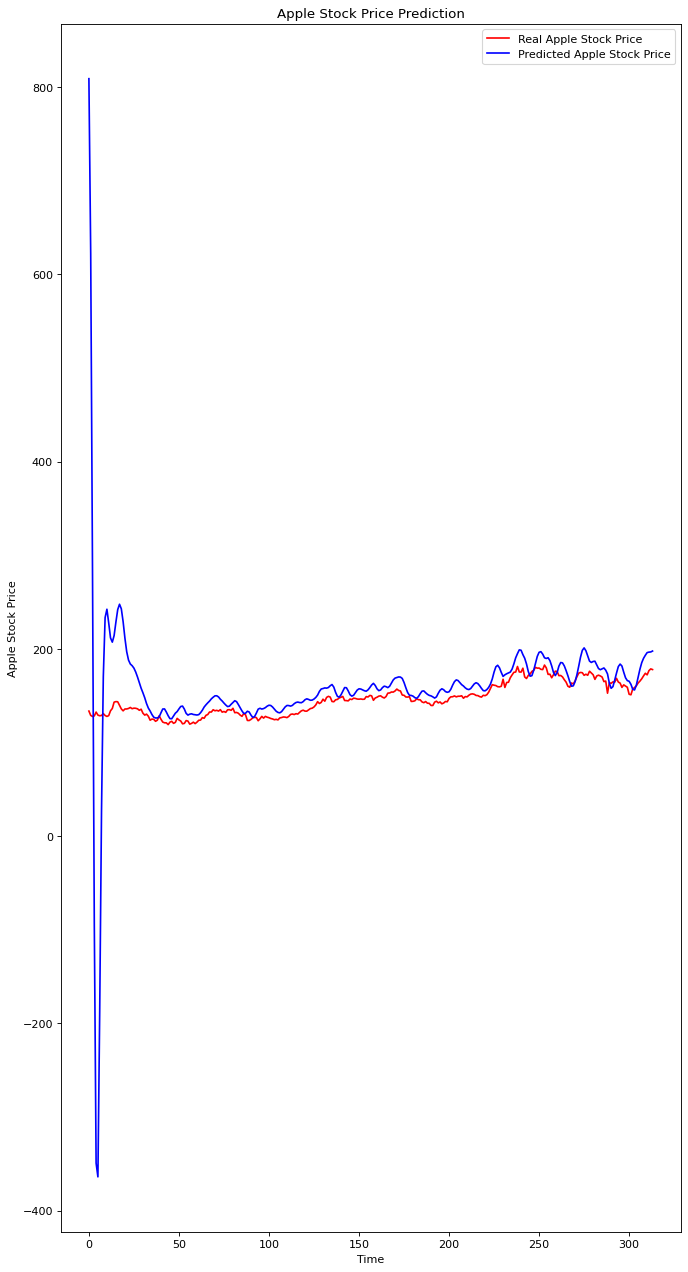

In [ ]:
# Visualising the results
from matplotlib.pyplot import figure

figure(figsize=(10, 20), dpi=80)

plt.plot(real_apple_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [ ]:
# Evaluating the model

import math

from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(real_apple_stock_price, predicted_stock_price))

print(f"rmse: {round(rmse,2)}")

rmse: 69.56
